<a href="https://colab.research.google.com/github/aucodes/MLProject/blob/main/MachineLearning_Project_DcLead.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
!pip install --upgrade scikit-learn



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,cohen_kappa_score,roc_auc_score,roc_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

from sklearn.feature_selection import SequentialFeatureSelector as sfs,RFE
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[15,7]

ImportError: ignored

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/aucodes/MLProject/main/waterQuality1.csv.xls')
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [ ]:
df.shape

(7999, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [ ]:
df = df.replace({'#NUM!':np.nan})
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [ ]:
df=df.dropna()

In [ ]:
df.shape

(7996, 21)

In [ ]:
df.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [ ]:
df['is_safe'].value_counts()

0    7084
1     912
Name: is_safe, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   object 
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [ ]:
df['ammonia']=df['ammonia'].astype(float)
df['is_safe']=df['is_safe'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [ ]:
# columns info

len(df.columns)

21

<ipython-input-32-e9e63c35bc09>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[:,i],hist=False)
<ipython-input-32-e9e63c35bc09>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[:,i],hist=False)
<ipython-input-32-e9e63c35bc09>:6: UserWarning: 

`distplot` is a de

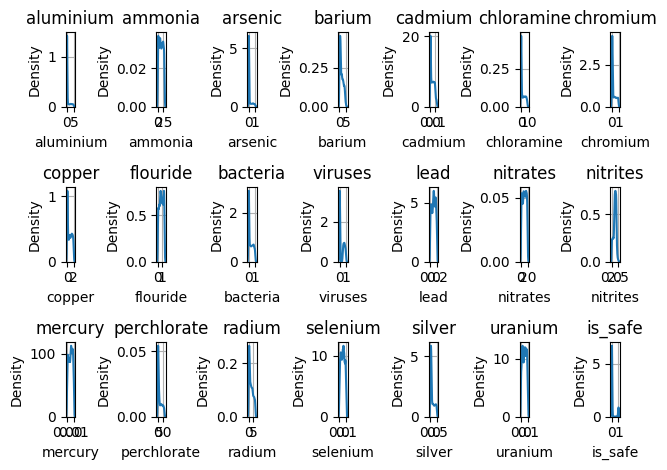

In [ ]:
r=3
c=7
it=1
for i in df.columns:
    plt.subplot(r,c,it)
    sns.distplot(df.loc[:,i],hist=False)
    plt.title(i)
    plt.grid()
    it+=1
plt.tight_layout()
plt.show()

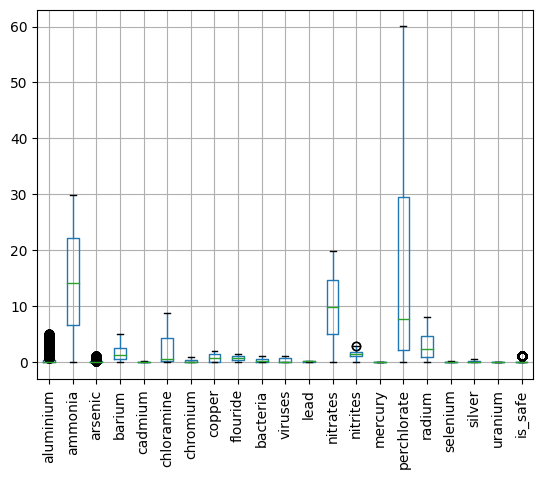

In [ ]:
# outliers

df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Bivariate Analysis

len(df.columns)

21

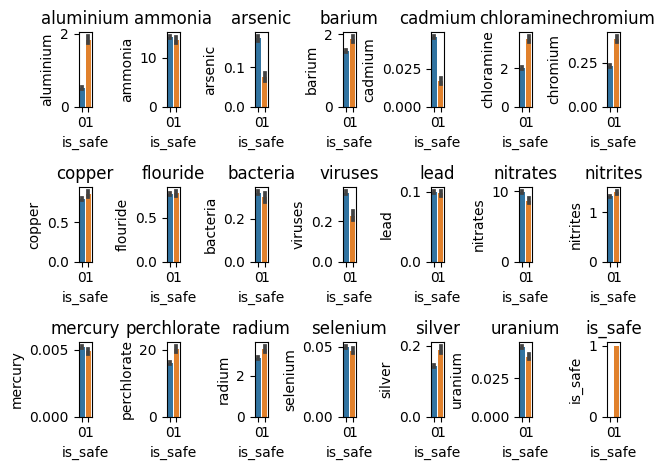

In [ ]:
r=3
c=7
it=1
for i in df.columns:
    plt.subplot(r,c,it)
    sns.barplot(y=df.loc[:,i],x='is_safe',data=df)
    plt.title(i)
    it+=1
plt.tight_layout()
plt.show()

In [ ]:
y = df['is_safe']
x = df.drop('is_safe',axis=1)

In [ ]:
xc = sm.add_constant(x)
xc.head()

,const,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,...,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,1.0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,...,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02
1,1.0,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,...,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05
2,1.0,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,...,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01
3,1.0,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,...,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05
4,1.0,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,...,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02


In [ ]:
model = sm.Logit(y,xc).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.247077
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                is_safe   No. Observations:                 7996
Model:                          Logit   Df Residuals:                     7975
Method:                           MLE   Df Model:                           20
Date:                Wed, 07 Jun 2023   Pseudo R-squ.:                  0.3038
Time:                        01:08:42   Log-Likelihood:                -1975.6
converged:                       True   LL-Null:                       -2837.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.6604      0.234      2.820      0.005       0.201       1.119
aluminium       0.7148    

In [ ]:
# train test split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)

# Model Building

In [ ]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
gnb = GaussianNB()

model_list = [lr,dt,rf,knn,gnb]

train_acc = []
test_acc = []

for i in model_list:
    i_model = i.fit(xtrain,ytrain)
    ytrain_pred = i_model.predict(xtrain)
    ytest_pred = i_model.predict(xtest)
    train_acc.append(accuracy_score(ytrain,ytrain_pred))
    test_acc.append(accuracy_score(ytest,ytest_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
train_acc

[0.9044130784348758, 1.0, 1.0, 0.9133464355904949, 0.8513489369304985]

In [ ]:
test_acc

[0.8928720300125053,
 0.9499791579824927,
 0.9541475614839516,
 0.862025844101709,
 0.8470195914964569]

# Confusion Matrix

**Train data**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


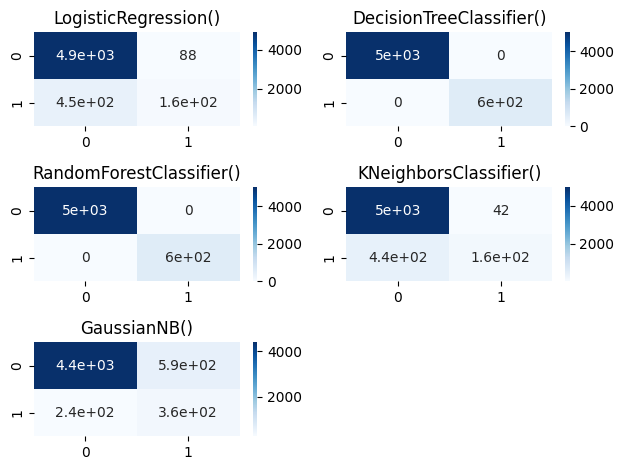

In [ ]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
gnb = GaussianNB()

model_list = [lr,dt,rf,knn,gnb]


r=3
c=2
it=1
for i in model_list:
    i_model = i.fit(xtrain,ytrain)
    ytrain_pred = i_model.predict(xtrain)
    ytest_pred = i_model.predict(xtest)
    plt.subplot(r,c,it)
    sns.heatmap(confusion_matrix(ytrain,ytrain_pred),annot=True,cmap='Blues')
    plt.title(i)
    it+=1
plt.tight_layout()
plt.show()

**Test data**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


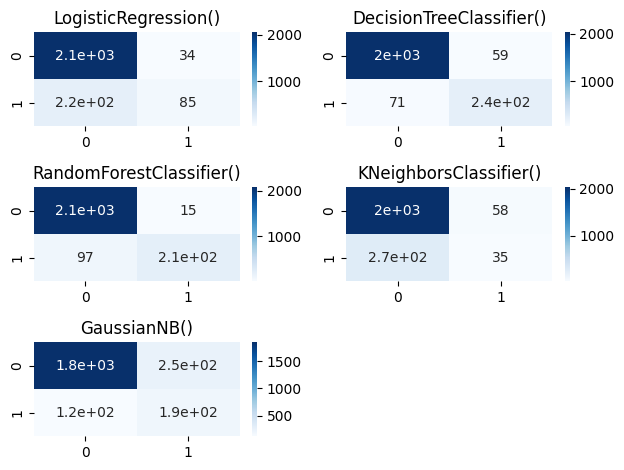

In [ ]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
gnb = GaussianNB()

model_list = [lr,dt,rf,knn,gnb]


r=3
c=2
it=1
for i in model_list:
    i_model = i.fit(xtrain,ytrain)
    ytrain_pred = i_model.predict(xtrain)
    ytest_pred = i_model.predict(xtest)
    plt.subplot(r,c,it)
    sns.heatmap(confusion_matrix(ytest,ytest_pred),annot=True,cmap='Blues')
    plt.title(i)
    it+=1
plt.tight_layout()
plt.show()

# Comparing the accuracies of train and test data

In [ ]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
gnb = GaussianNB()


model_dict = {'Model':model_list,'Train Score':train_acc,'Test Score':test_acc}
model_dict

{'Model': [LogisticRegression(),
  DecisionTreeClassifier(),
  RandomForestClassifier(),
  KNeighborsClassifier(),
  GaussianNB()],
 'Train Score': [0.9044130784348758,
  1.0,
  1.0,
  0.9133464355904949,
  0.8513489369304985],
 'Test Score': [0.8928720300125053,
  0.9491454772822009,
  0.952897040433514,
  0.862025844101709,
  0.8470195914964569]}

In [ ]:
model_summary = pd.DataFrame({'Model':model_list,'Train Score':train_acc,'Test Score':test_acc})
model_summary

,Model,Train Score,Test Score
0,LogisticRegression(),0.904413,0.892872
1,DecisionTreeClassifier(),1.000000,0.949145
2,"(DecisionTreeClassifier(max_features='sqrt', r...",1.000000,0.952897
3,KNeighborsClassifier(),0.913346,0.862026
4,GaussianNB(),0.851349,0.847020


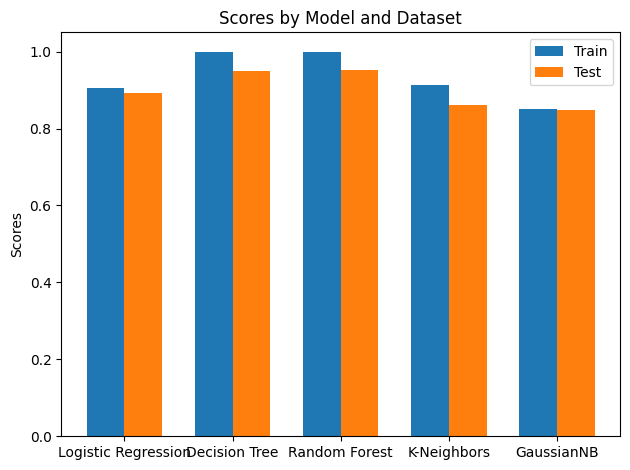

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Neighbors', 'GaussianNB']

train_scores = train_acc
test_scores = test_acc

x = np.arange(len(model_names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, train_scores, width, label='Train')
rects2 = ax.bar(x + width/2, test_scores, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by Model and Dataset')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

fig.tight_layout()

plt.show()


# Finding the best parameters

**Decision Tree**

In [ ]:
dt = DecisionTreeClassifier()
params=[{'criterion':['gini','entropy'],
             'max_depth':range(2,5),
             'min_samples_leaf':range(2,7),
             }]

grd = GridSearchCV(estimator=dt,param_grid=params,cv=3)

grd_model = grd.fit(xtrain,ytrain)

grd_model.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4}

In [ ]:
dt = DecisionTreeClassifier(criterion=grd_model.best_params_.get('criterion'),
                           max_depth=grd_model.best_params_.get('max_depth'),
                           min_samples_leaf=grd_model.best_params_.get('max_depth'))

dt_model = dt.fit(xtrain,ytrain)

ytrain_pred = dt_model.predict(xtrain)
ytest_pred = dt_model.predict(xtest)

In [ ]:
print("The accuracy score of regularized Decision tree is: ",accuracy_score(ytrain,ytrain_pred))
print("The accuracy score of regularized Decision tree is: ",accuracy_score(ytest,ytest_pred))

The accuracy score of regularized Decision tree is:  0.951759871359657
The accuracy score of regularized Decision tree is:  0.9433097123801584


**Random Forest**

In [ ]:
rf = RandomForestClassifier()
params=[{'n_estimators':[100,150,200],
       'criterion':['gini','entropy'],
             'max_depth':range(2,5),
             'min_samples_leaf':range(2,7),
             }]

grd = GridSearchCV(estimator=rf,param_grid=params,cv=3)

grd_model = grd.fit(xtrain,ytrain)

grd_model.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 3,
 'n_estimators': 150}

In [ ]:
rf = RandomForestClassifier(criterion=grd_model.best_params_.get('criterion'),
                           max_depth=grd_model.best_params_.get('max_depth'),
                           min_samples_leaf=grd_model.best_params_.get('max_depth'),
                           n_estimators=grd_model.best_params_.get('n_estimators'))

rf_model = rf.fit(xtrain,ytrain)

ytrain_pred = rf_model.predict(xtrain)
ytest_pred = rf_model.predict(xtest)

In [ ]:
print("The accuracy score of regularized Random Forest is: ",accuracy_score(ytrain,ytrain_pred))
print("The accuracy score of regularized Random Forest is: ",accuracy_score(ytest,ytest_pred))

The accuracy score of regularized Random Forest is:  0.9449705199213865
The accuracy score of regularized Random Forest is:  0.924968736973739


**KNeighbors Classifier**

In [ ]:
knn = KNeighborsClassifier()
params=[{'n_neighbors':[3,5,7],
         'metric':['euclidean','manhattan']}]

grd = GridSearchCV(estimator=knn,param_grid=params,cv=3)

grd_model = grd.fit(xtrain,ytrain)

grd_model.best_params_

{'metric': 'manhattan', 'n_neighbors': 7}

In [ ]:
knn = KNeighborsClassifier(n_neighbors=grd_model.best_params_.get('n_neighbors'),
                          metric=grd_model.best_params_.get('metric'))

knn_model = knn.fit(xtrain,ytrain)

ytrain_pred = knn_model.predict(xtrain)
ytest_pred = knn_model.predict(xtest)

In [ ]:
print("The accuracy score of regularized KN classifier is: ",accuracy_score(ytrain,ytrain_pred))
print("The accuracy score of regularized KN Classifier is: ",accuracy_score(ytest,ytest_pred))

The accuracy score of regularized KN classifier is:  0.9103090941575844
The accuracy score of regularized KN Classifier is:  0.8686952897040433


# Feature Importances

In [ ]:
rf_model = rf.fit(xtrain,ytrain)
rf_model.feature_importances_

array([0.24973179, 0.01852368, 0.12739417, 0.00984142, 0.21928603,
       0.07316212, 0.05594412, 0.00588361, 0.00230147, 0.02206376,
       0.02725895, 0.00416619, 0.01304353, 0.01503161, 0.00203517,
       0.09100162, 0.01186729, 0.00273647, 0.03293047, 0.01579655])

In [ ]:
importances = pd.DataFrame(xtrain.columns,columns=['Features'])
importances

,Features
0,aluminium
1,ammonia
2,arsenic
3,barium
4,cadmium
5,chloramine
6,chromium
7,copper
8,flouride
9,bacteria


In [ ]:
importances['Feature_importances'] = rf_model.feature_importances_
importances

,Features,Feature_importances
0,aluminium,0.249732
1,ammonia,0.018524
2,arsenic,0.127394
3,barium,0.009841
4,cadmium,0.219286
5,chloramine,0.073162
6,chromium,0.055944
7,copper,0.005884
8,flouride,0.002301
9,bacteria,0.022064


In [ ]:
imp = importances.sort_values(by='Feature_importances',ascending=False)
imp

,Features,Feature_importances
0,aluminium,0.249732
4,cadmium,0.219286
2,arsenic,0.127394
15,perchlorate,0.091002
5,chloramine,0.073162
6,chromium,0.055944
18,silver,0.032930
10,viruses,0.027259
9,bacteria,0.022064
1,ammonia,0.018524


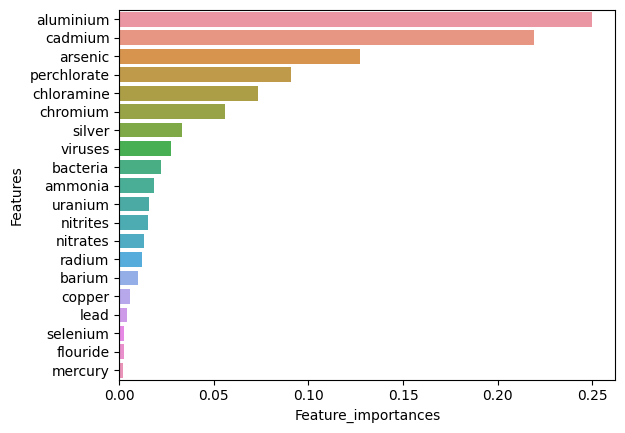

In [ ]:
sns.barplot(y=imp['Features'],x=imp['Feature_importances'])
plt.show()

In [ ]:
# Important Features according to above mentioned Barplot:

imp['Features'][0:7].values

array(['aluminium', 'cadmium', 'arsenic', 'perchlorate', 'chloramine',
       'chromium', 'silver'], dtype=object)

**'aluminium', 'cadmium', 'arsenic', 'perchlorate', 'chloramine','chromium', 'silver'** are some of the important features which affect the water quality.